In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


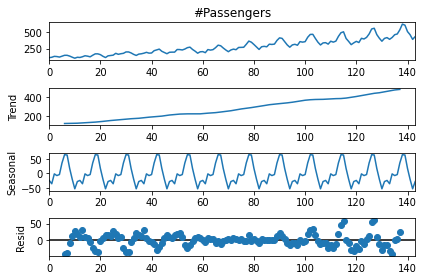

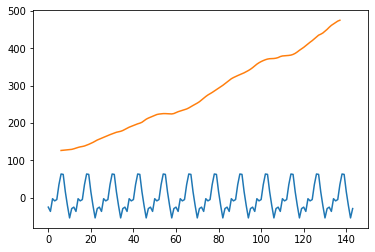

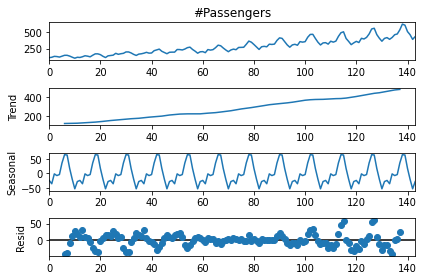

In [5]:
result = seasonal_decompose(df['#Passengers'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [6]:
adf = adfuller(df.loc[:, '#Passengers'].values, autolag = 'AIC')
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])
print("n_lags:", adf[2])
for key, value in adf[4].items():
    print("Critical values:", key, value)

ADF Statistic: 0.8153688792060433
p-value: 0.9918802434376409
n_lags: 13
Critical values: 1% -3.4816817173418295
Critical values: 5% -2.8840418343195267
Critical values: 10% -2.578770059171598


In [7]:
if(adf[1]<0.05):
    print("Stationary data")
else:
    print("Non-stationary data") 

Non-stationary data


<AxesSubplot:>

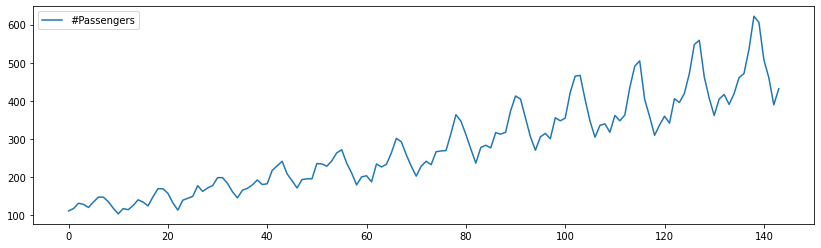

In [8]:
df.plot(figsize=(14, 4))

In [9]:
df["#Passengers_diff1"] = df["#Passengers"].diff(periods=1)
df["#Passengers_diff2"] = df["#Passengers"].diff(periods=2)
df["#Passengers_diff3"] = df["#Passengers"].diff(periods=3)

In [10]:
df.head()

,Month,#Passengers,#Passengers_diff1,#Passengers_diff2,#Passengers_diff3
0,1949-01,112,NaN,NaN,NaN
1,1949-02,118,6.0,NaN,NaN
2,1949-03,132,14.0,20.0,NaN
3,1949-04,129,-3.0,11.0,17.0
4,1949-05,121,-8.0,-11.0,3.0


In [11]:
df = df.dropna()

In [12]:
results = adfuller(df["#Passengers_diff1"].dropna())

<AxesSubplot:>

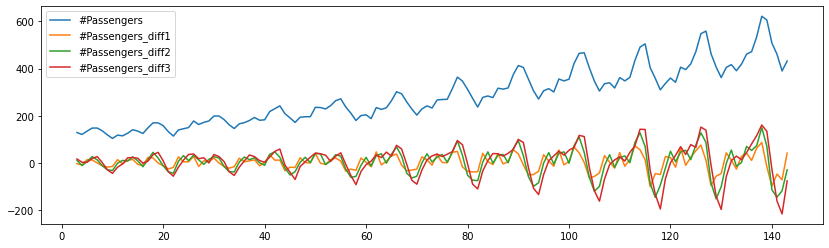

In [13]:
df.plot(figsize=(14, 4))

<AxesSubplot:>

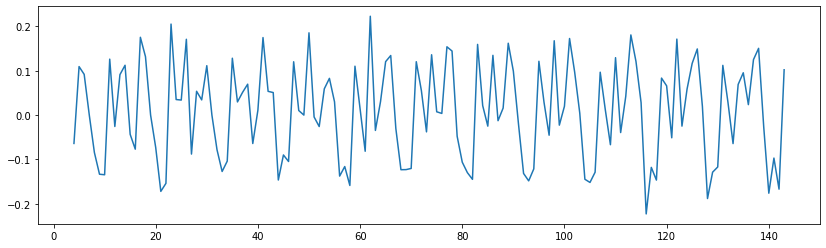

In [14]:
transformed_df = pd.Series(np.log(df["#Passengers"])).diff().dropna()
transformed_df.plot(figsize=(14, 4))

In [15]:
result = adfuller(df.loc[:, '#Passengers_diff1'].values, autolag = 'AIC')
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("n_lags:", result[2])
for key, value in result[4].items():
    print("Critical values:", key, value)

ADF Statistic: -2.878508675108282
p-value: 0.0479048318455621
n_lags: 12
Critical values: 1% -3.4825006939887997
Critical values: 5% -2.884397984161377
Critical values: 10% -2.578960197753906


In [16]:
result = adfuller(df.loc[:, '#Passengers_diff2'].values, autolag = 'AIC')
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("n_lags:", result[2])
for key, value in result[4].items():
    print("Critical values:", key, value)

ADF Statistic: -2.9414812512932196
p-value: 0.040732576886759256
n_lags: 11
Critical values: 1% -3.482087964046026
Critical values: 5% -2.8842185101614626
Critical values: 10% -2.578864381347275


In [17]:
result = adfuller(df.loc[:, '#Passengers_diff3'].values, autolag = 'AIC')
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("n_lags:", result[2])
for key, value in result[4].items():
    print("Critical values:", key, value)

ADF Statistic: -2.886505856544971
p-value: 0.04693983572510754
n_lags: 10
Critical values: 1% -3.4816817173418295
Critical values: 5% -2.8840418343195267
Critical values: 10% -2.578770059171598
